In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#created in create_embeddings
X_test = pd.read_csv('../Machine_Learning/X_test.csv')
y_test = pd.read_csv('../Machine_Learning/y_test.csv')
X_train = pd.read_csv('../Machine_Learning/X_train.csv')
y_train = pd.read_csv('../Machine_Learning/y_train.csv')

In [129]:
# Count the occurrences of each value
value_counts = y_train.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_train)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_train that are 1: {num_ones}")
print(f"Percentage of entries in y_train that are 1: {percent_ones:.2f}%")

Number of entries in y_train that are 1: 96
Percentage of entries in y_train that are 1: 10.67%


In [130]:
# Count the occurrences of each value
value_counts = y_test.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_test)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_test that are 1: {num_ones}")
print(f"Percentage of entries in y_test that are 1: {percent_ones:.2f}%")

Number of entries in y_test that are 1: 29
Percentage of entries in y_test that are 1: 12.89%


In [ ]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [131]:



# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store cross-validation scores, test scores, and feature importances
results = {}


# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')
    
    # Perform 10-fold cross-validation on the training set
    cv_results = {metric: cross_val_score(clf, X_train, y_train, cv=10, scoring=scorer) 
                  for metric, scorer in scoring.items()}
    
    # Fit the model on the training set
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)

    
    
    # Evaluate on test set
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
    
    feature_importances = None
    
    # Get feature importances or coefficients
    if hasattr(clf, 'feature_importances_'):
        feature_importances = clf.feature_importances_
    elif hasattr(clf, 'coef_'):
        feature_importances = clf.coef_[0]
    
    # Store results
    results[name] = {
        "Cross-Validation Scores": cv_results,
        "Mean CV Scores": {metric: np.mean(scores) for metric, scores in cv_results.items()},
        "CV Scores Std Dev": {metric: np.std(scores) for metric, scores in cv_results.items()},
        "Test Scores": test_scores,
        "Feature Importances": feature_importances,
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

# Convert the results to a DataFrame for easier plotting
data = []

for name, result in results.items():
    for metric, scores in result["Cross-Validation Scores"].items():
        for score in scores:
            data.append({
                "Classifier": name,
                "Metric": metric,
                "Score": score
            })

df = pd.DataFrame(data)

# Create bar plots for each metric
metrics = scoring.keys()

Random Forest


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionW

Logistic Regression


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConve

K-Nearest Neighbors


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: Data

Decision Tree
Naive Bayes


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConve

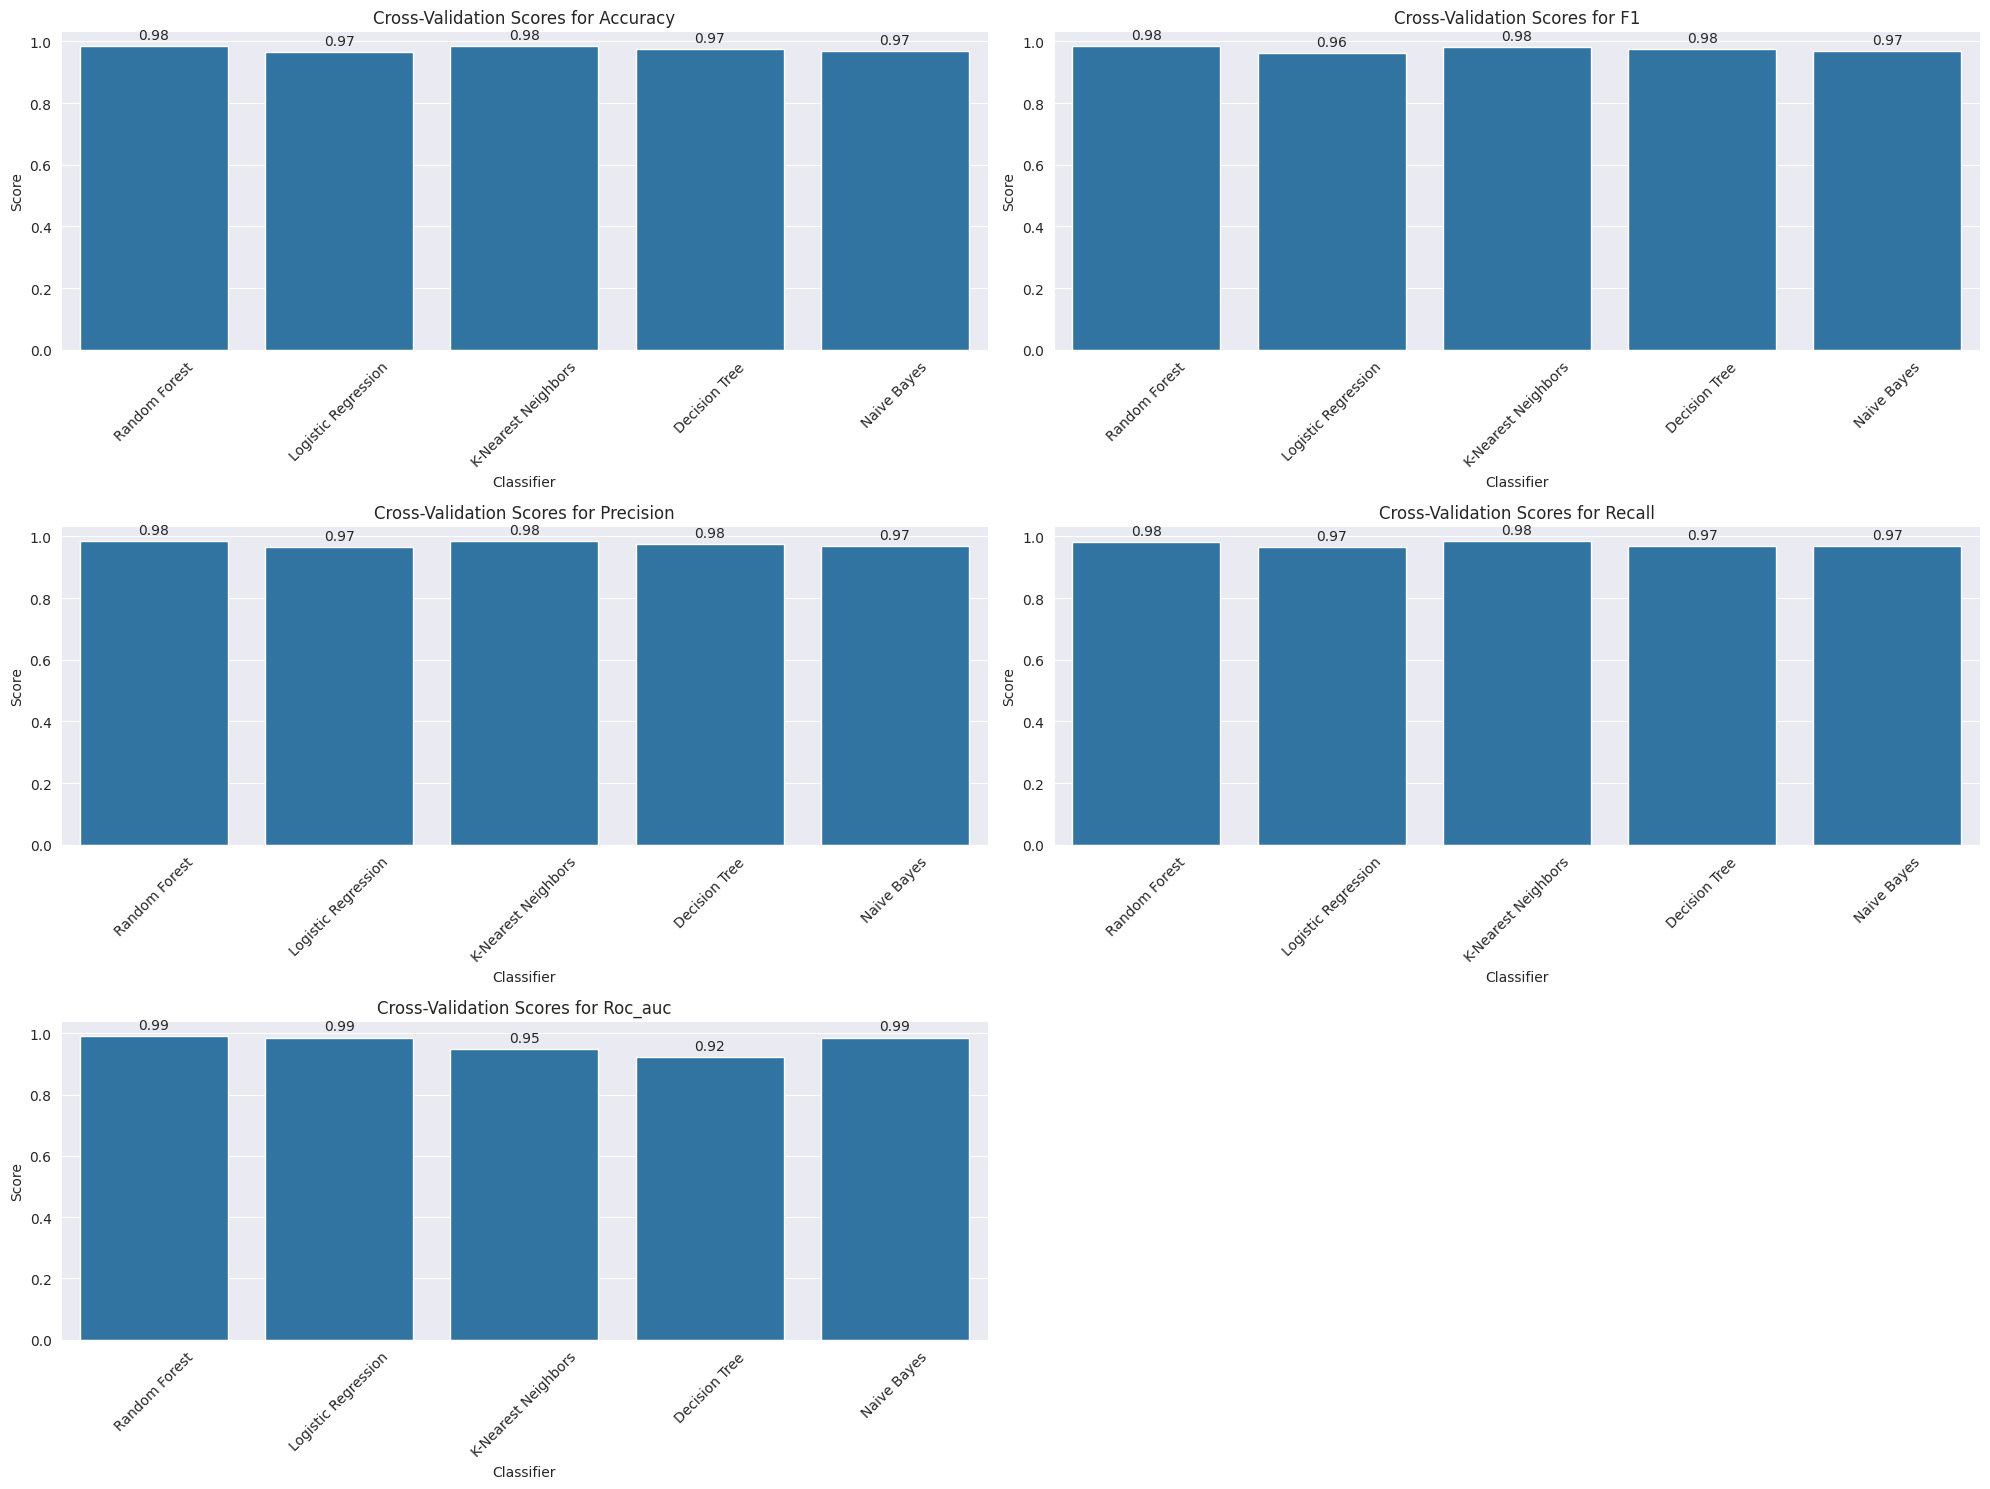

In [132]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(scoring.keys())

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df[df["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Cross-Validation Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])
# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics.pdf')
plt.show()


# With Moderna as y_test

In [133]:
#created in create_embeddings
X_test = pd.read_csv('../Machine_Learning/X_test_Moderna.csv')
y_test = pd.read_csv('../Machine_Learning/y_test_Moderna.csv')
X_train = pd.read_csv('../Machine_Learning/X_train_Moderna.csv')
y_train = pd.read_csv('../Machine_Learning/y_train_Moderna.csv')

In [134]:
# Count the occurrences of each value
value_counts = y_test.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_train)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_train that are 1: {num_ones}")
print(f"Percentage of entries in y_train that are 1: {percent_ones:.2f}%")

Number of entries in y_train that are 1: 33
Percentage of entries in y_train that are 1: 4.37%


In [135]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [136]:
# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store cross-validation scores, test scores, and feature importances
results = {}


# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')
    
    # Perform 10-fold cross-validation on the training set
    cv_results = {metric: cross_val_score(clf, X_train, y_train, cv=10, scoring=scorer) 
                  for metric, scorer in scoring.items()}
    
    # Fit the model on the training set
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)

    
    
    # Evaluate on test set
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
    
    feature_importances = None
    
    # Get feature importances or coefficients
    if hasattr(clf, 'feature_importances_'):
        feature_importances = clf.feature_importances_
    elif hasattr(clf, 'coef_'):
        feature_importances = clf.coef_[0]
    
    # Store results
    results[name] = {
        "Cross-Validation Scores": cv_results,
        "Mean CV Scores": {metric: np.mean(scores) for metric, scores in cv_results.items()},
        "CV Scores Std Dev": {metric: np.std(scores) for metric, scores in cv_results.items()},
        "Test Scores": test_scores,
        "Feature Importances": feature_importances,
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

# Convert the results to a DataFrame for easier plotting
data = []

for name, result in results.items():
    for metric, scores in result["Cross-Validation Scores"].items():
        for score in scores:
            data.append({
                "Classifier": name,
                "Metric": metric,
                "Score": score
            })

df = pd.DataFrame(data)

# Create bar plots for each metric
metrics = scoring.keys()

Random Forest
Logistic Regression
K-Nearest Neighbors
Decision Tree
Naive Bayes


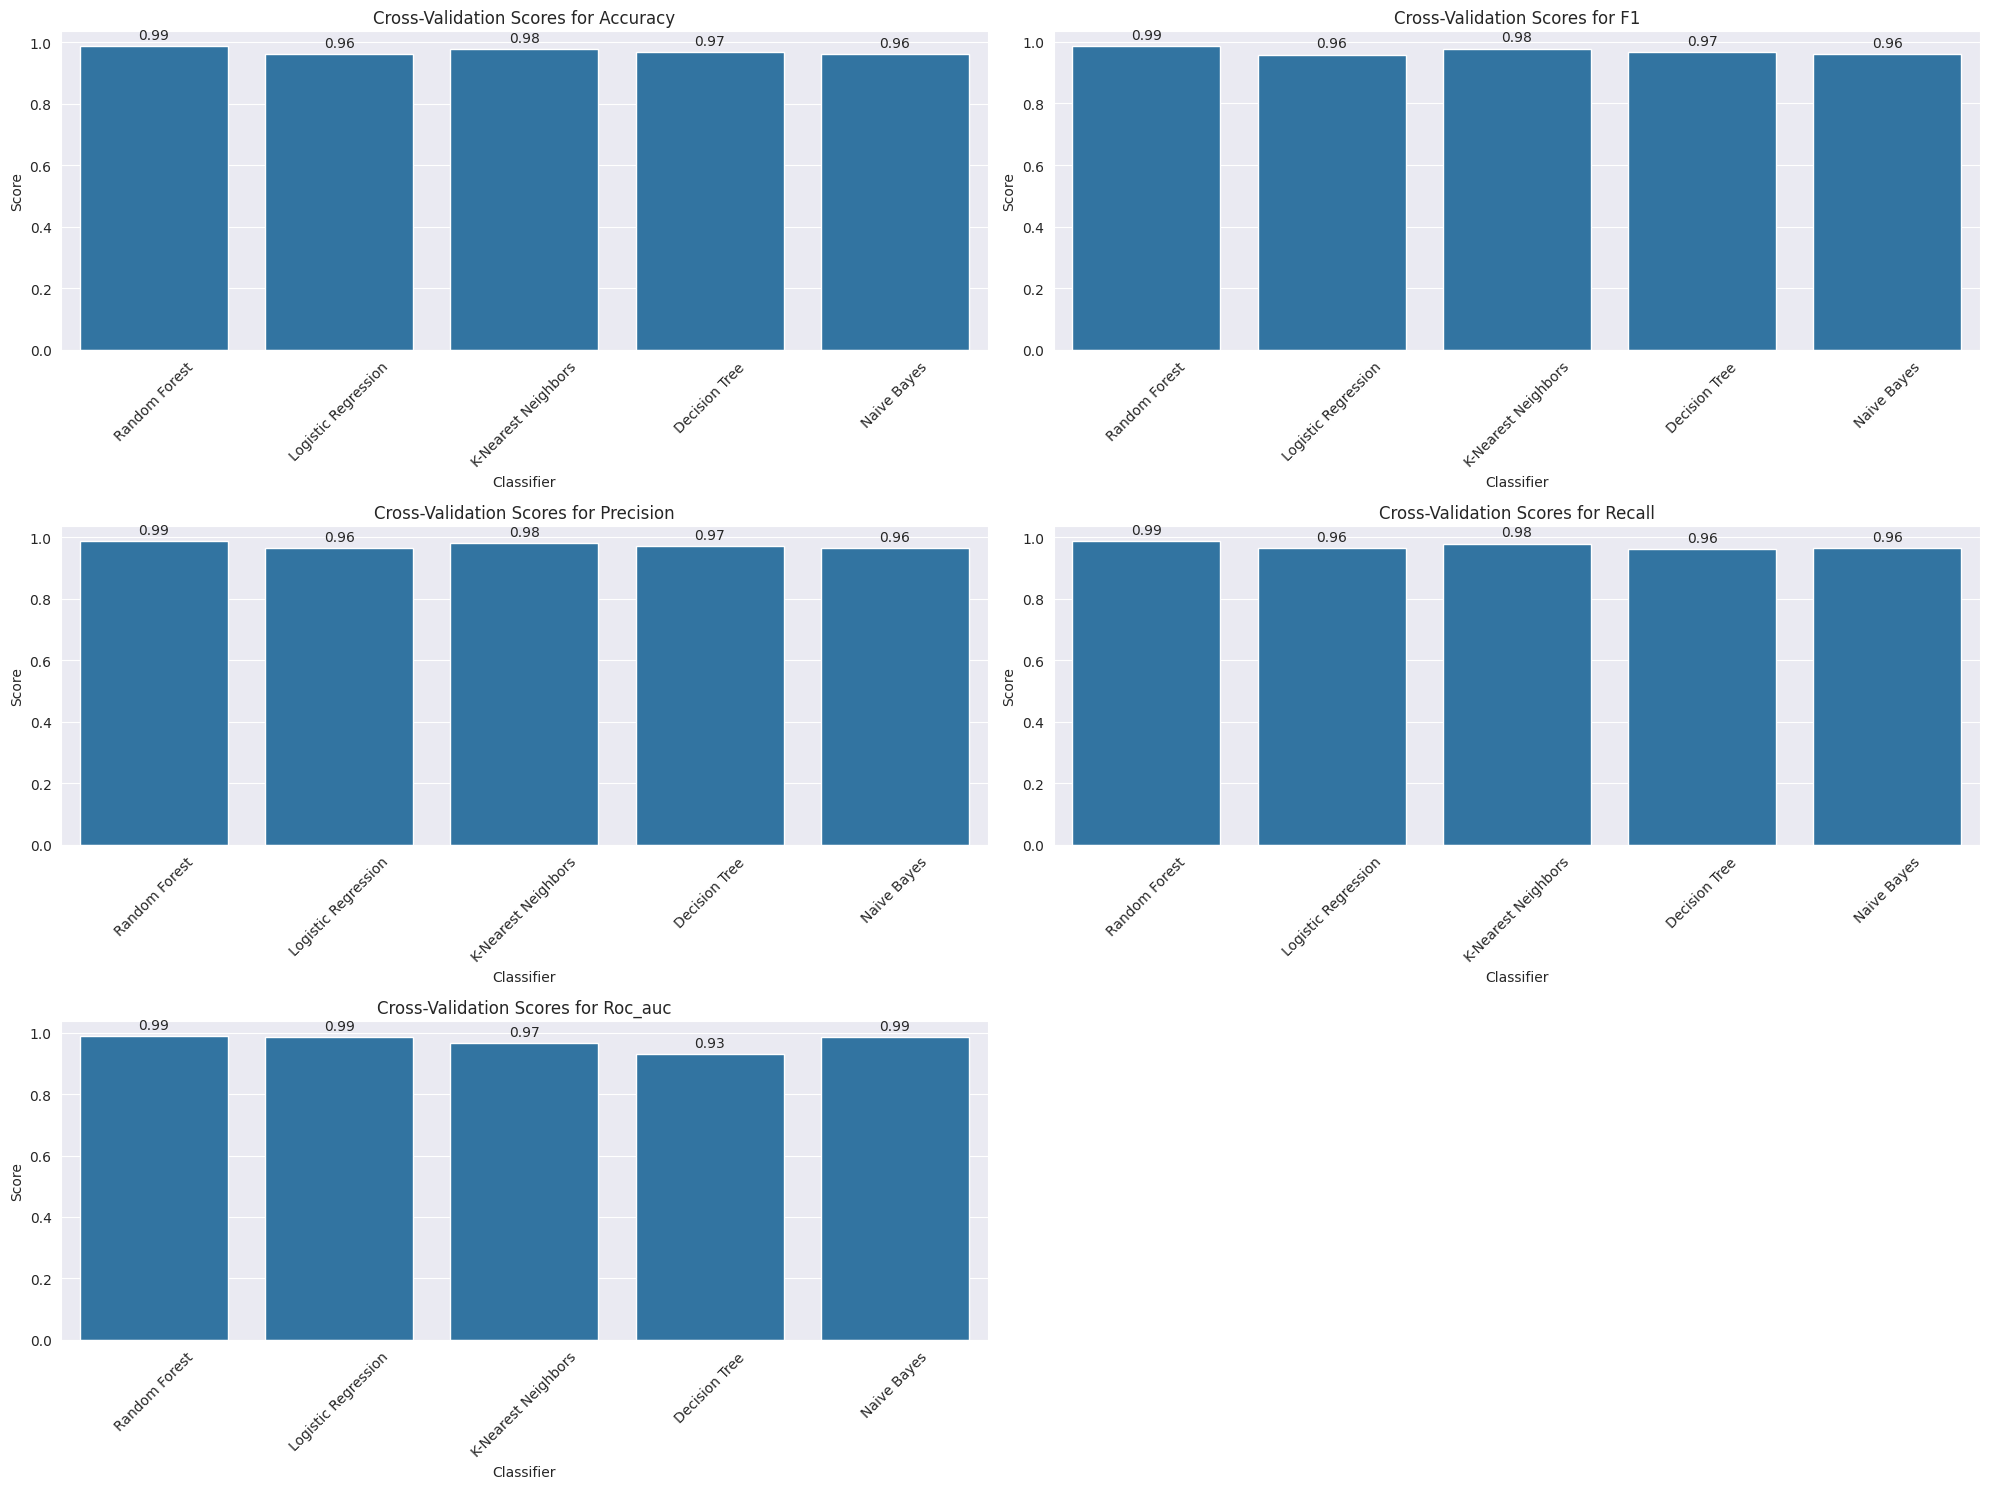

In [137]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(scoring.keys())

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df[df["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Cross-Validation Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xlabel('Classifier')
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])
# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_Moderna_test.pdf')
plt.show()


# With JANSSEN as y_test


In [143]:
#created in create_embeddings
X_test = pd.read_csv('../Machine_Learning/X_test_Janssen.csv')
y_test = pd.read_csv('../Machine_Learning/y_test_Janssen.csv')
X_train = pd.read_csv('../Machine_Learning/X_train_Janssen.csv')
y_train = pd.read_csv('../Machine_Learning/y_train_Janssen.csv')

In [146]:
# Count the occurrences of each value
value_counts = y_test.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_test)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_test that are 1: {num_ones}")
print(f"Percentage of entries in y_test that are 1: {percent_ones:.2f}%")

Number of entries in y_test that are 1: 35
Percentage of entries in y_test that are 1: 16.59%


In [140]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [141]:
# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store cross-validation scores, test scores, and feature importances
results = {}


# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')
    
    # Perform 10-fold cross-validation on the training set
    cv_results = {metric: cross_val_score(clf, X_train, y_train, cv=10, scoring=scorer) 
                  for metric, scorer in scoring.items()}
    
    # Fit the model on the training set
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    
    # Evaluate on test set
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
    
    feature_importances = None
    
    # Get feature importances or coefficients
    if hasattr(clf, 'feature_importances_'):
        feature_importances = clf.feature_importances_
    elif hasattr(clf, 'coef_'):
        feature_importances = clf.coef_[0]
    
    # Store results
    results[name] = {
        "Cross-Validation Scores": cv_results,
        "Mean CV Scores": {metric: np.mean(scores) for metric, scores in cv_results.items()},
        "CV Scores Std Dev": {metric: np.std(scores) for metric, scores in cv_results.items()},
        "Test Scores": test_scores,
        "Feature Importances": feature_importances,
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

# Convert the results to a DataFrame for easier plotting
data = []

for name, result in results.items():
    for metric, scores in result["Cross-Validation Scores"].items():
        for score in scores:
            data.append({
                "Classifier": name,
                "Metric": metric,
                "Score": score
            })

df = pd.DataFrame(data)

# Create bar plots for each metric
metrics = scoring.keys()

Random Forest
Logistic Regression
K-Nearest Neighbors
Decision Tree
Naive Bayes


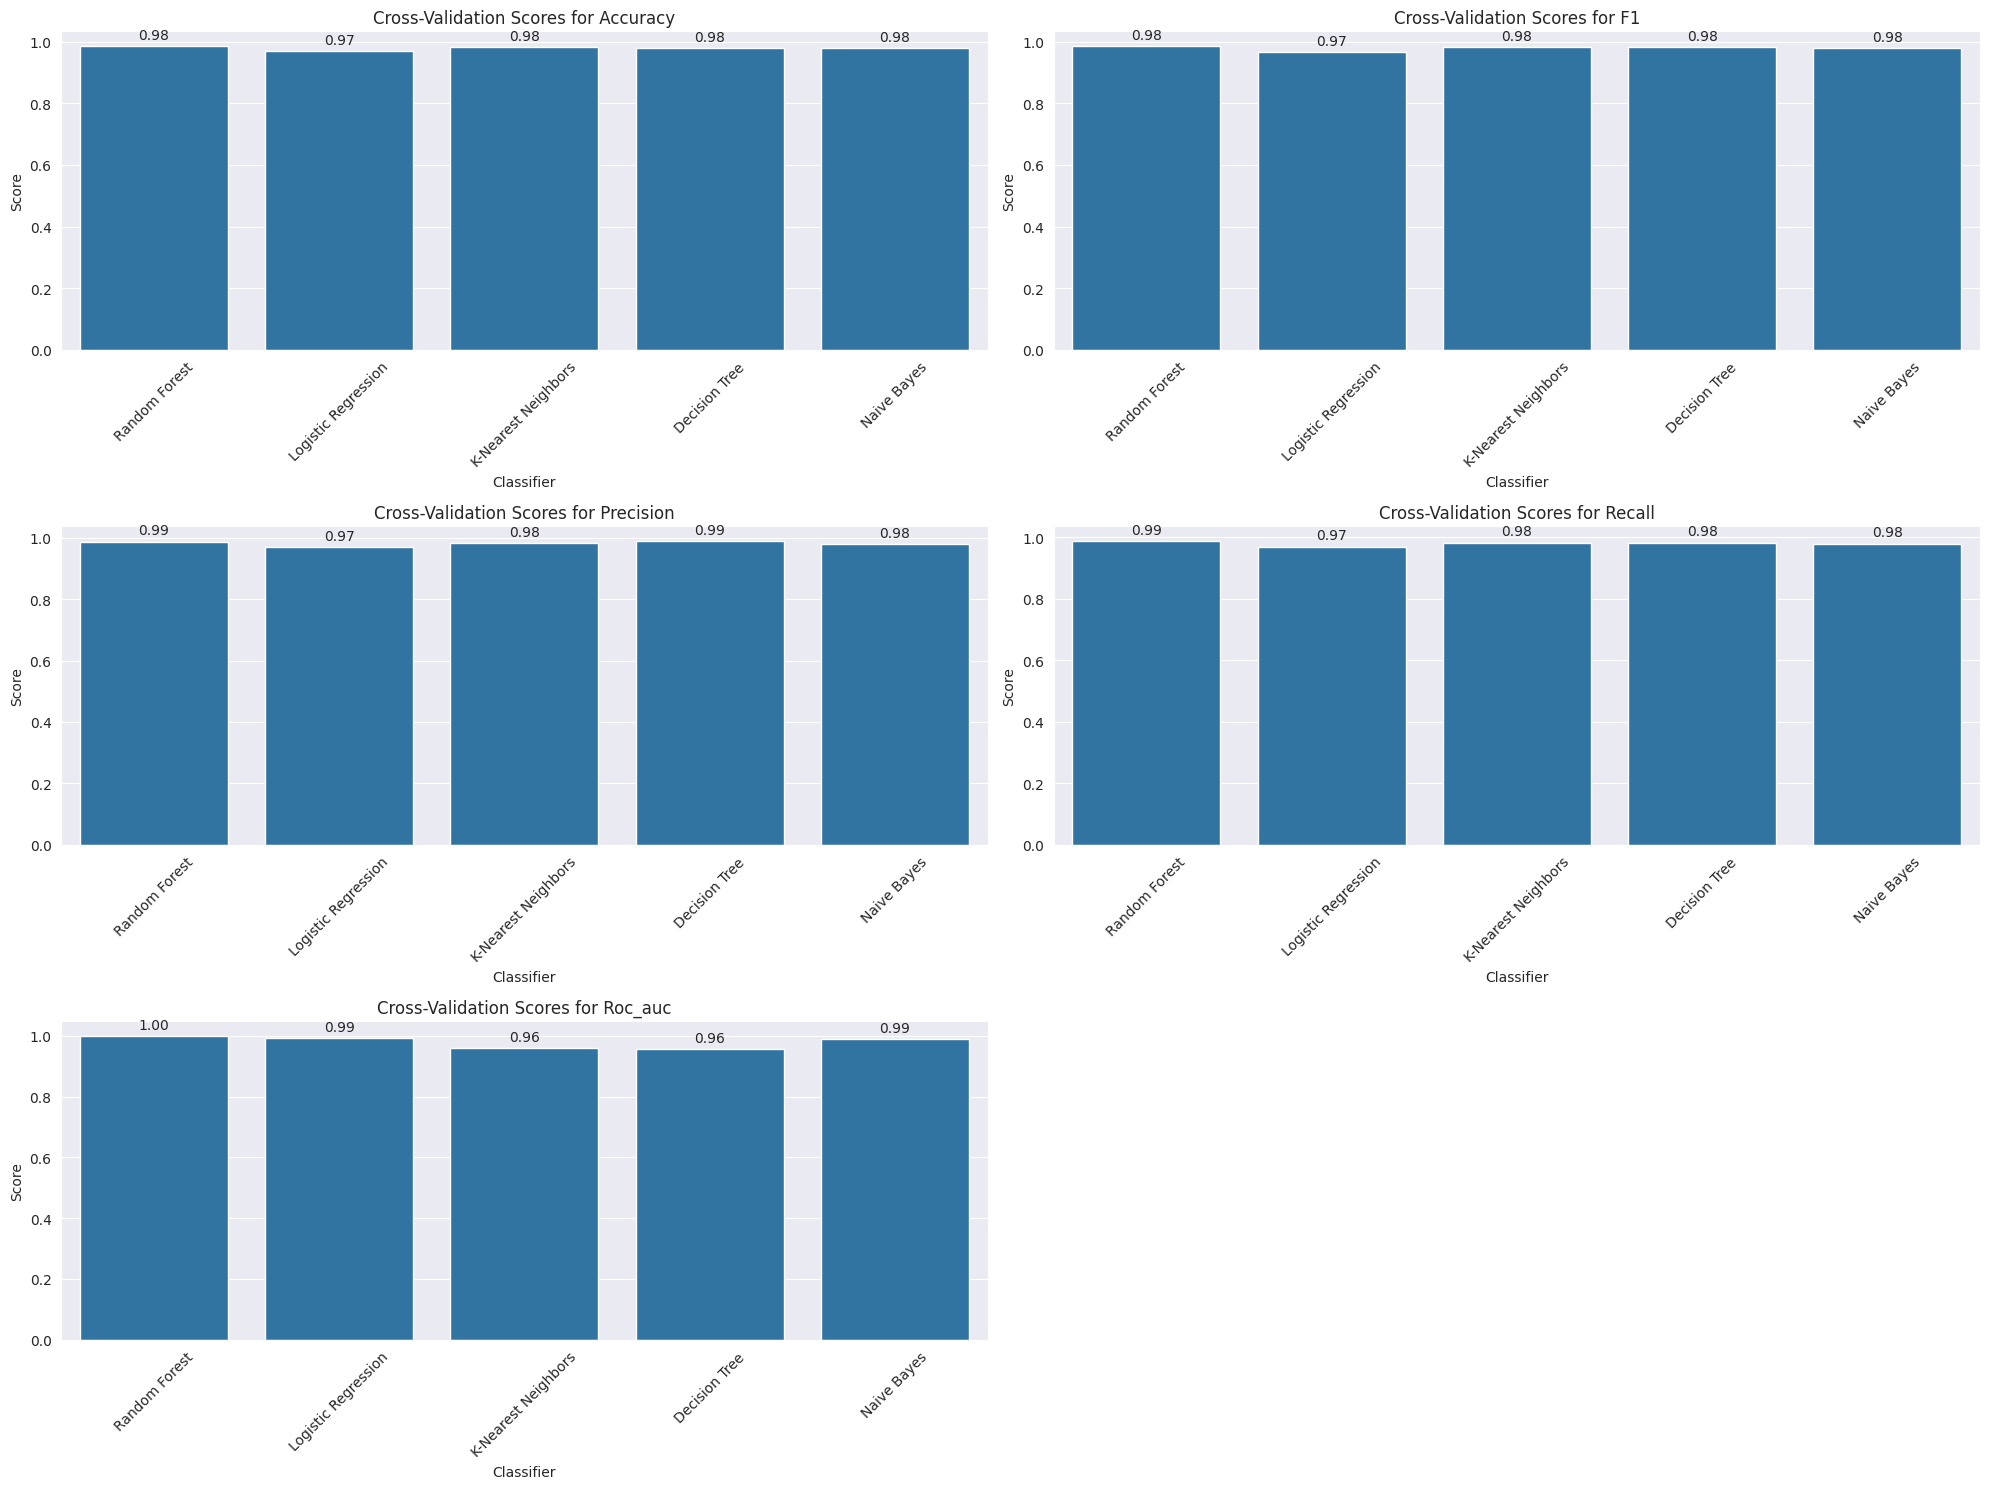

In [142]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(scoring.keys())

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df[df["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Cross-Validation Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_Janssen_test.pdf')
plt.show()
